In [1]:
from manim import *

### **1. Bases**

In [2]:
%%manim -qm -v WARNING CreateSquare

class CreateSquare(Scene):
    def construct(self):
        square = Square()
        square.set_fill(RED, opacity=0.5)
        square.set_stroke(color=BLUE, width=4)
        square.rotate(PI / 4)

        self.play(Create(square))

Manim Community v0.19.0

In [3]:
%%manim -qm -v WARNING DisplayObjects

class DisplayObjects(Scene):
    def construct(self):
        circle = Circle()
        square = Square()
        triangle = Triangle()
        
        self.play(Create(circle))
        self.wait()
        self.add(square)
        self.wait()
        self.play(Create(triangle))
        self.wait()

Manim Community v0.19.0

In [4]:
%%manim -qm -v WARNING DisplayLatex

class DisplayLatex(Scene):
    def construct(self):
        tex = MathTex(r"\int_{-\infty}^{+\infty} e^{-x^2} dx = \sqrt{\pi}", font_size=96)
        self.play(Create(tex))
        self.wait()

Manim Community v0.19.0

### **2. Transformations**

In [5]:
%%manim -qm -v WARNING SquareToCircle

class SquareToCircle(Scene):
    def construct(self):
        square = Square()
        circle = Circle()
        circle.set_fill(PINK, opacity=0.5)

        self.play(Create(square))
        self.play(Transform(square, circle))
        self.wait()

Manim Community v0.19.0

In [6]:
%%manim -qm -v WARNING SimpleTransform

class SimpleTransform(Scene):
    def construct(self):
        square_1 = Square()
        square_2 = Square().move_to(LEFT * 2)
        self.play(Transform(square_1, square_2))

Manim Community v0.19.0

In [7]:
%%manim -qm -v WARNING CircularTransform

class CircularTransform(Scene):
    def construct(self):
        square_1 = Square()
        square_2 = Square().move_to(RIGHT * 2)
        self.play(Transform(square_1, square_2, path_arc=PI))

Manim Community v0.19.0

In [8]:
%%manim -qm -v WARNING CustomPathTransform

class CustomPathTransform(Scene):
    def construct(self):
        square_1 = Square()
        square_2 = Square()
        
        def custom_path_func(start_points, end_points, alpha):
            return start_points + alpha * (end_points - start_points) + np.sin(alpha * PI) * RIGHT
        
        self.play(Transform(square_1, square_2, path_func=custom_path_func))

Manim Community v0.19.0

In [9]:
%%manim -qm -v WARNING FadeInFadeOut

class FadeInFadeOut(Scene):
    def construct(self):
        square_1 = Square()
        square_2 = Square().move_to(UP * 2)
        square_3 = Square().move_to(DOWN * 2 + RIGHT * 2)
        
        self.play(Transform(square_1, square_2, replace_mobject_with_target_in_scene=True))
        self.wait()
        self.play(Transform(square_2, square_3))

Manim Community v0.19.0

In [10]:
%%manim -qm -v WARNING DifferentRotations

class DifferentRotations(Scene):
    def construct(self):
        left_square = Square(color=BLUE, fill_opacity=0.7).shift(2 * LEFT)
        right_square = Square(color=GREEN, fill_opacity=0.7).shift(2 * RIGHT)
        
        self.play(
            left_square.animate.rotate(PI), Rotate(right_square, angle=PI), run_time=2
        )
        self.wait()

Manim Community v0.19.0

### **3. Gérer plusieurs objets (VGroup)**

Manim Community v0.19.0

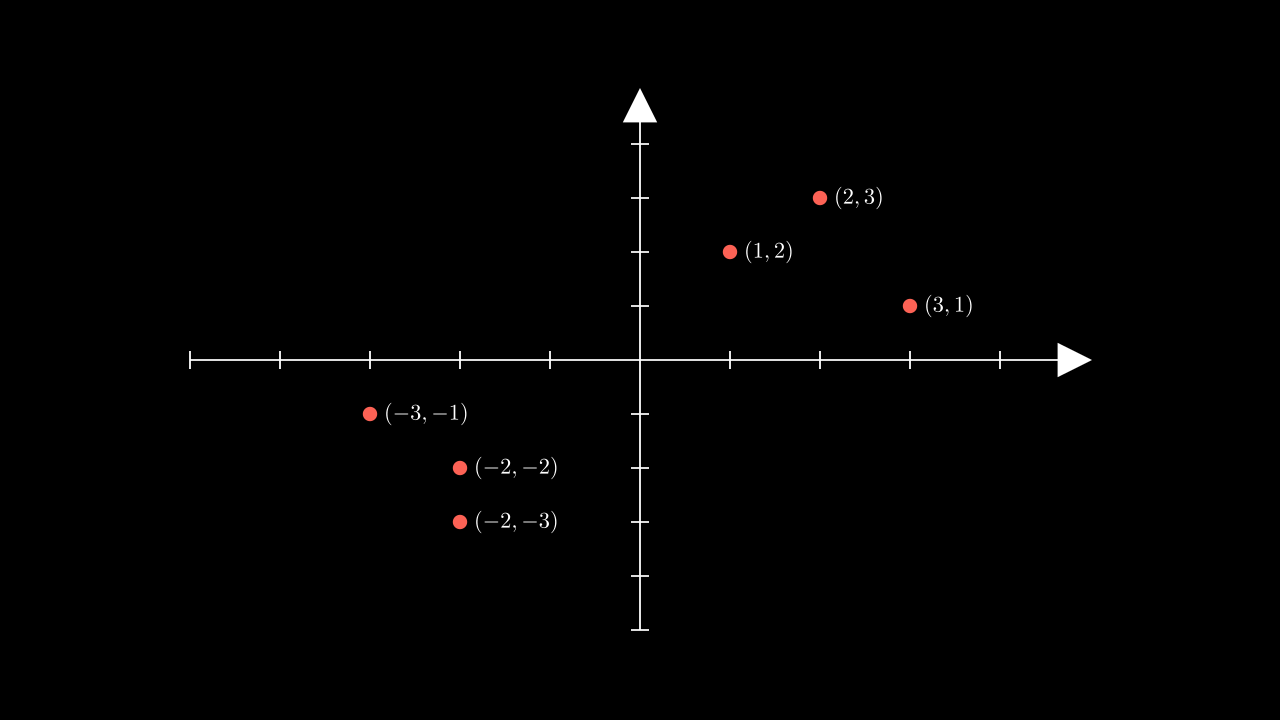

In [11]:
%%manim -qm -v WARNING PointsAvecCoordonnees

class PointsAvecCoordonnees(Scene):
    def construct(self):
        # Créer les axes avec des nombres
        axes = Axes(
            x_range=[-5, 5, 1],
            y_range=[-5, 5, 1],
            x_length=10,
            y_length=6,
            axis_config={"include_numbers": False},
        )
        
        # Liste des coordonnées de points
        coordonnees_points = [
            (1, 2),
            (2, 3),
            (3, 1),
            (-2, -2),
            (-2, -3),
            (-3, -1),
        ]
        
        # Créer un VGroup pour les points
        points = VGroup()
        for coord in coordonnees_points:
            # Convertir les données en position sur les axes
            point = Dot(point=axes.coords_to_point(coord[0], coord[1]), color=RED)
            points.add(point)
        
        # Ajouter les axes et les points à la scène
        self.add(axes, points)
        
        # Ajouter les coordonnées à côté de chaque point
        for point, coord in zip(points, coordonnees_points):
            # Créer le texte des coordonnées
            texte_coord = MathTex(f"({coord[0]}, {coord[1]})", font_size=24)
            
            # Positionner le texte à côté du point
            texte_coord.next_to(point, RIGHT, buff=0.1)
            
            # Ajouter le texte à la scène
            self.add(texte_coord)

Manim Community v0.19.0

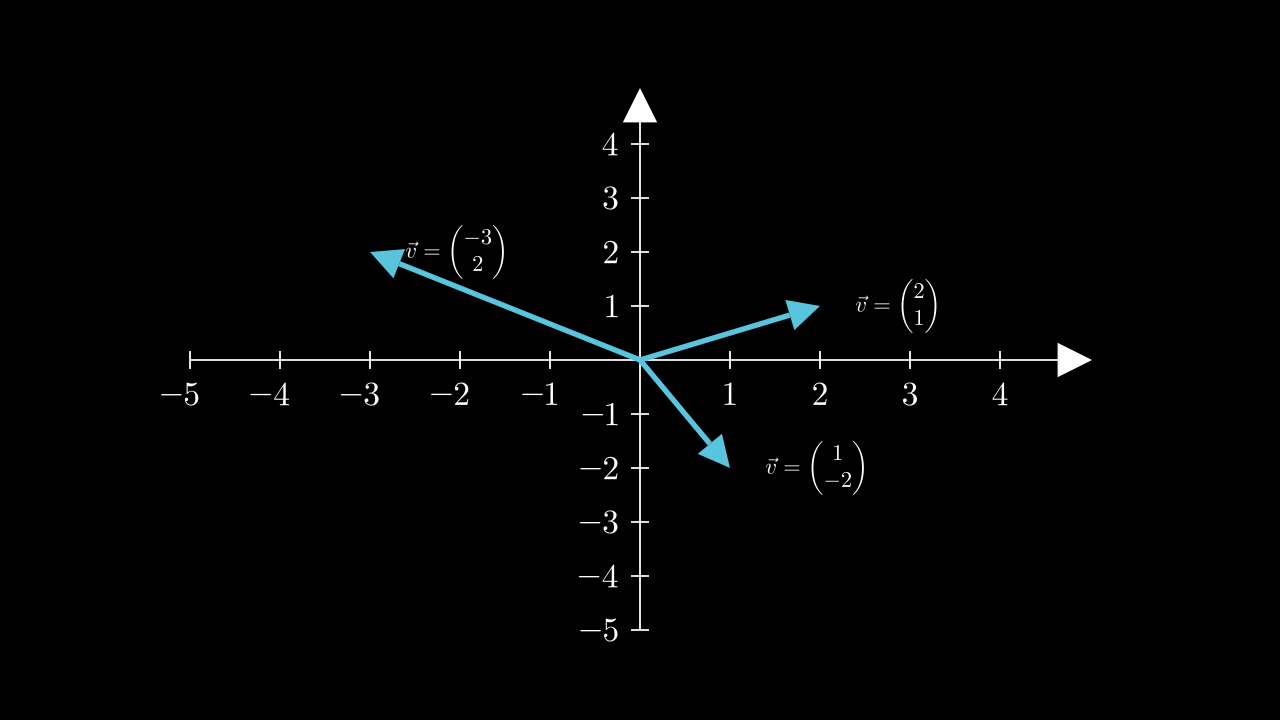

In [12]:
%%manim -qm -v WARNING VecteursAvecCoordonnees

class VecteursAvecCoordonnees(Scene):
    def construct(self):
        # Créer les axes avec des nombres
        axes = Axes(
            x_range=[-5, 5, 1],
            y_range=[-5, 5, 1],
            x_length=10,
            y_length=6,
            axis_config={"include_numbers": True},
        )
        
        # Liste des vecteurs (composantes x et y)
        liste_vecteurs = [
            [2, 1],
            [-3, 2],
            [1, -2],
        ]
        
        # Créer un VGroup pour les vecteurs
        vecteurs = VGroup()
        for composantes in liste_vecteurs:
            # Créer le vecteur à partir des composantes
            vecteur = Vector(
                direction=axes.coords_to_point(composantes[0], composantes[1]),
                color=BLUE,
            )
            
            # Ajouter le vecteur au VGroup
            vecteurs.add(vecteur)
        
        # Ajouter les axes et les vecteurs à la scène
        self.add(axes, vecteurs)
        
        # Ajouter les composantres à côté de chaque vecteur
        for vecteur, composantes in zip(vecteurs, liste_vecteurs):
            # Créer le texte des composantes
            texte_composantes = MathTex(
                f"\\vec{{v}} = \\begin{{pmatrix}} {composantes[0]} \\\\ {composantes[1]} \\end{{pmatrix}}",
                font_size=24,
            )
            
            # Positionner le texte à l'extrémité du vecteur
            texte_composantes.next_to(vecteur.get_end(), RIGHT, buff=0.4)
            
            # Ajouter le texte à la scène
            self.add(texte_composantes)

### **4. Fonctions 2D**

Manim Community v0.19.0

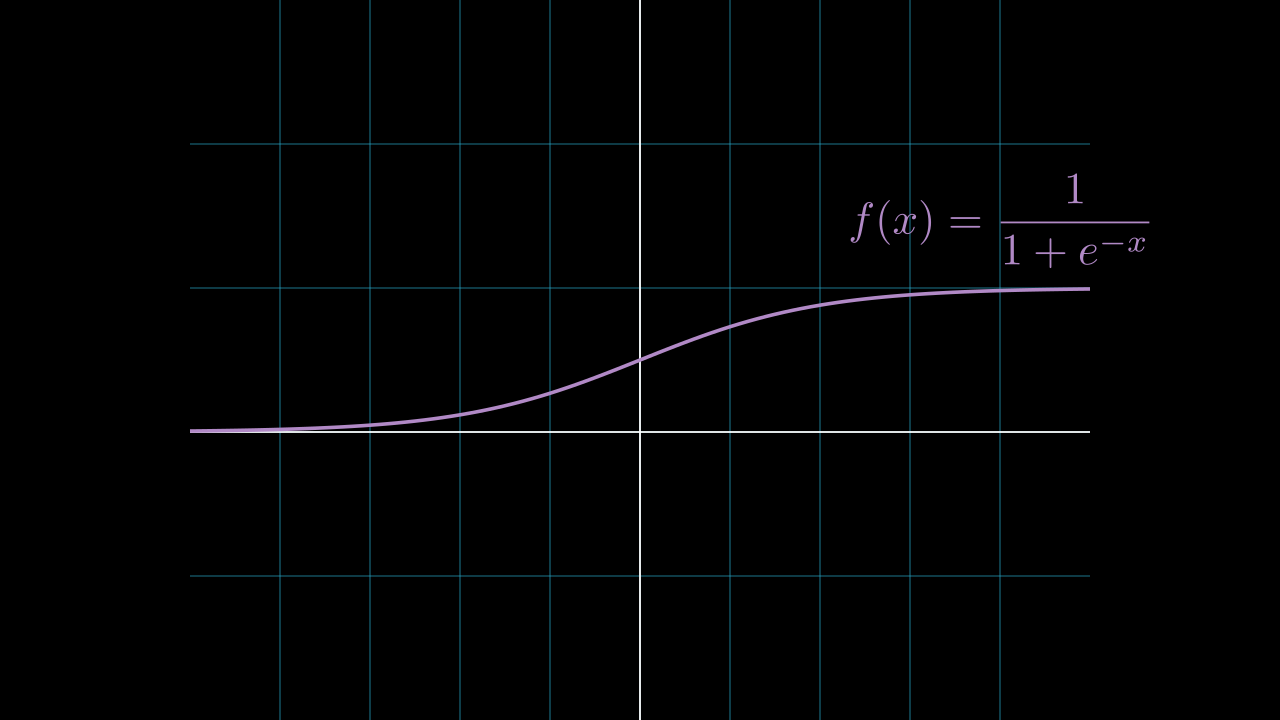

In [13]:
%%manim -qm -v WARNING TracerFonctionSigmoidQuad

class TracerFonctionSigmoidQuad(Scene):
    def construct(self):
        # On crée le quadrillage
        ax = NumberPlane(
            x_range=[-5, 5],
            y_range=[-2, 3],
            y_length=8,
            background_line_style={"stroke_opacity": 0.4},
        )
        
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))
        
        # On trace la fonction sigmoïde en violet
        curve = ax.plot(lambda x: sigmoid(x), color=PURPLE_B)
        
        # On ajoute une légende en haut à droite
        label = ax.get_graph_label(curve, r"f(x) = \frac{1}{1 + e^{-x}}", x_val=4, direction=UP)
        
        # On ajoute le quadrillage, la courbe et la légende à la scène
        self.add(ax, curve, label)

In [14]:
%%manim -qm -v WARNING TracerFonctionSigmoidAxes

class TracerFonctionSigmoidAxes(Scene):
    def construct(self):
        # On crée les axes
        ax = Axes(
            x_range=[-5, 5, 1],
            y_range=[-0.2, 1.2, 0.2],
            x_length=10,
            y_length=6,
            axis_config={"color": WHITE},
            tips=True,
        )
        
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))
        
        # On trace la fonction sigmoïde
        curve = ax.plot(lambda x: sigmoid(x), color=BLUE)
        
        # On ajoute une légende en haut à droite
        label = ax.get_graph_label(curve, r"f(x) = \frac{1}{1 + e^{-x}}", x_val=4, direction=UP)
        
        # On ajoute le quadrillage, la courbe et la légende à la scène
        self.play(Create(ax), Create(curve), Create(label), run_time=2)

Manim Community v0.19.0

### **5. Fonctions 3D**

Manim Community v0.19.0

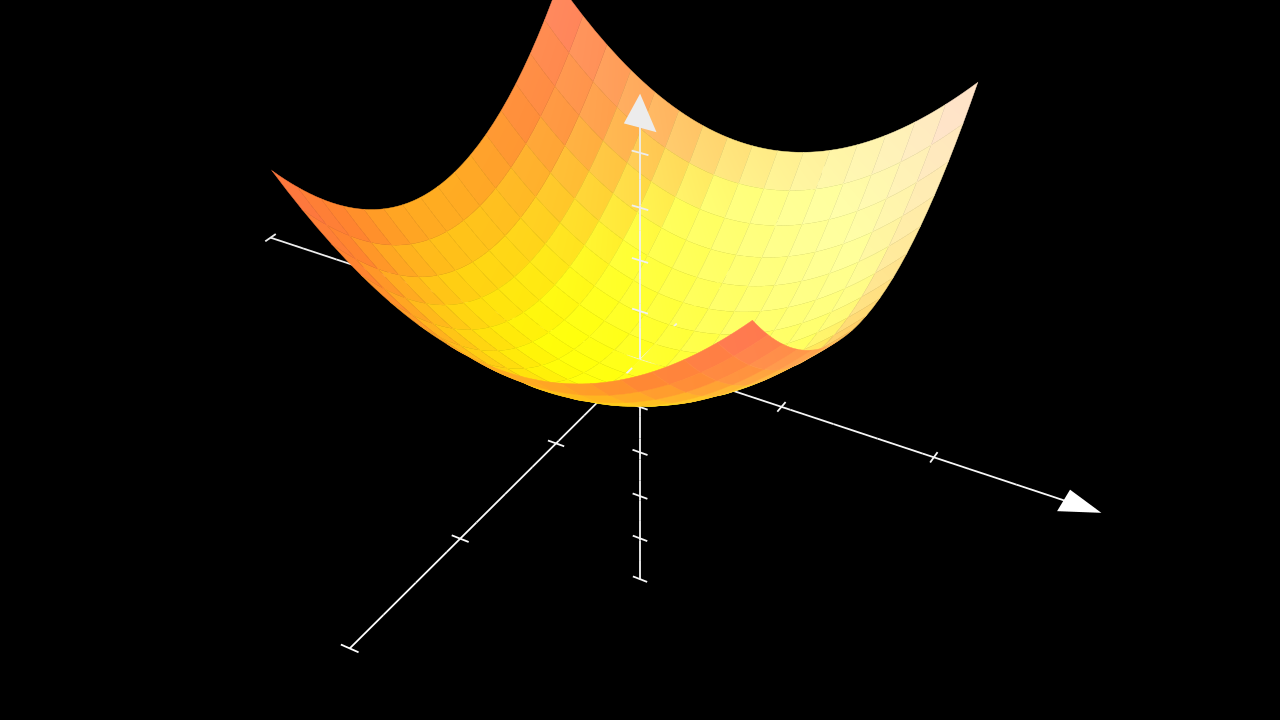

In [15]:
%%manim -qm -v WARNING PlotSurface

class PlotSurface(ThreeDScene):
    def construct(self):
        resolution_fa = 16
        self.set_camera_orientation(phi=55 * DEGREES, theta=-60 * DEGREES)
        
        axes = ThreeDAxes(x_range=(-3, 3, 1), y_range=(-3, 3, 1), z_range=(-5, 5, 1))
        
        def param_trig(u, v):
            return u**2 + v**2
        
        trig_plane = axes.plot_surface(
            param_trig,
            resolution=(resolution_fa, resolution_fa),
            u_range=(-1.5, 1.5),
            v_range=(-1.5, 1.5),
            colorscale = [BLUE, GREEN, YELLOW, ORANGE, RED],
        )
        
        self.add(axes, trig_plane)
        

In [16]:
%%manim -qm -v WARNING PlotSurfaceMoving

class PlotSurfaceMoving(ThreeDScene):
    def construct(self):
        resolution_fa = 16
        self.set_camera_orientation(phi=55 * DEGREES, theta=-60 * DEGREES)
        
        axes = ThreeDAxes(x_range=(-3, 3, 1), y_range=(-3, 3, 1), z_range=(-5, 5, 1))
        
        def param_trig(u, v):
            return u**2 + v**2
        
        trig_plane = axes.plot_surface(
            param_trig,
            resolution=(resolution_fa, resolution_fa),
            u_range=(-1.5, 1.5),
            v_range=(-1.5, 1.5),
            colorscale = [BLUE, GREEN, YELLOW, ORANGE, RED],
        )
        
        self.add(axes, trig_plane)
        
        self.begin_ambient_camera_rotation(rate=0.2)
        self.wait(4)
        self.stop_ambient_camera_rotation()

Manim Community v0.19.0